<a href="https://colab.research.google.com/github/mchandler-CPT/mscai-eportfolio/blob/main/UNIT02_SEMINAR_2_MPG_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Google Drive...
Mounted at /content/drive

Loading data from: /content/drive/My Drive/Unit02 auto-mpg (1) (1).csv
File loaded successfully!

--- Raw Data Sample (First 5 Rows) ---
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  

--- Data Dimensions ---
(398, 9)

--- Basic Statistical Summary ---
              c

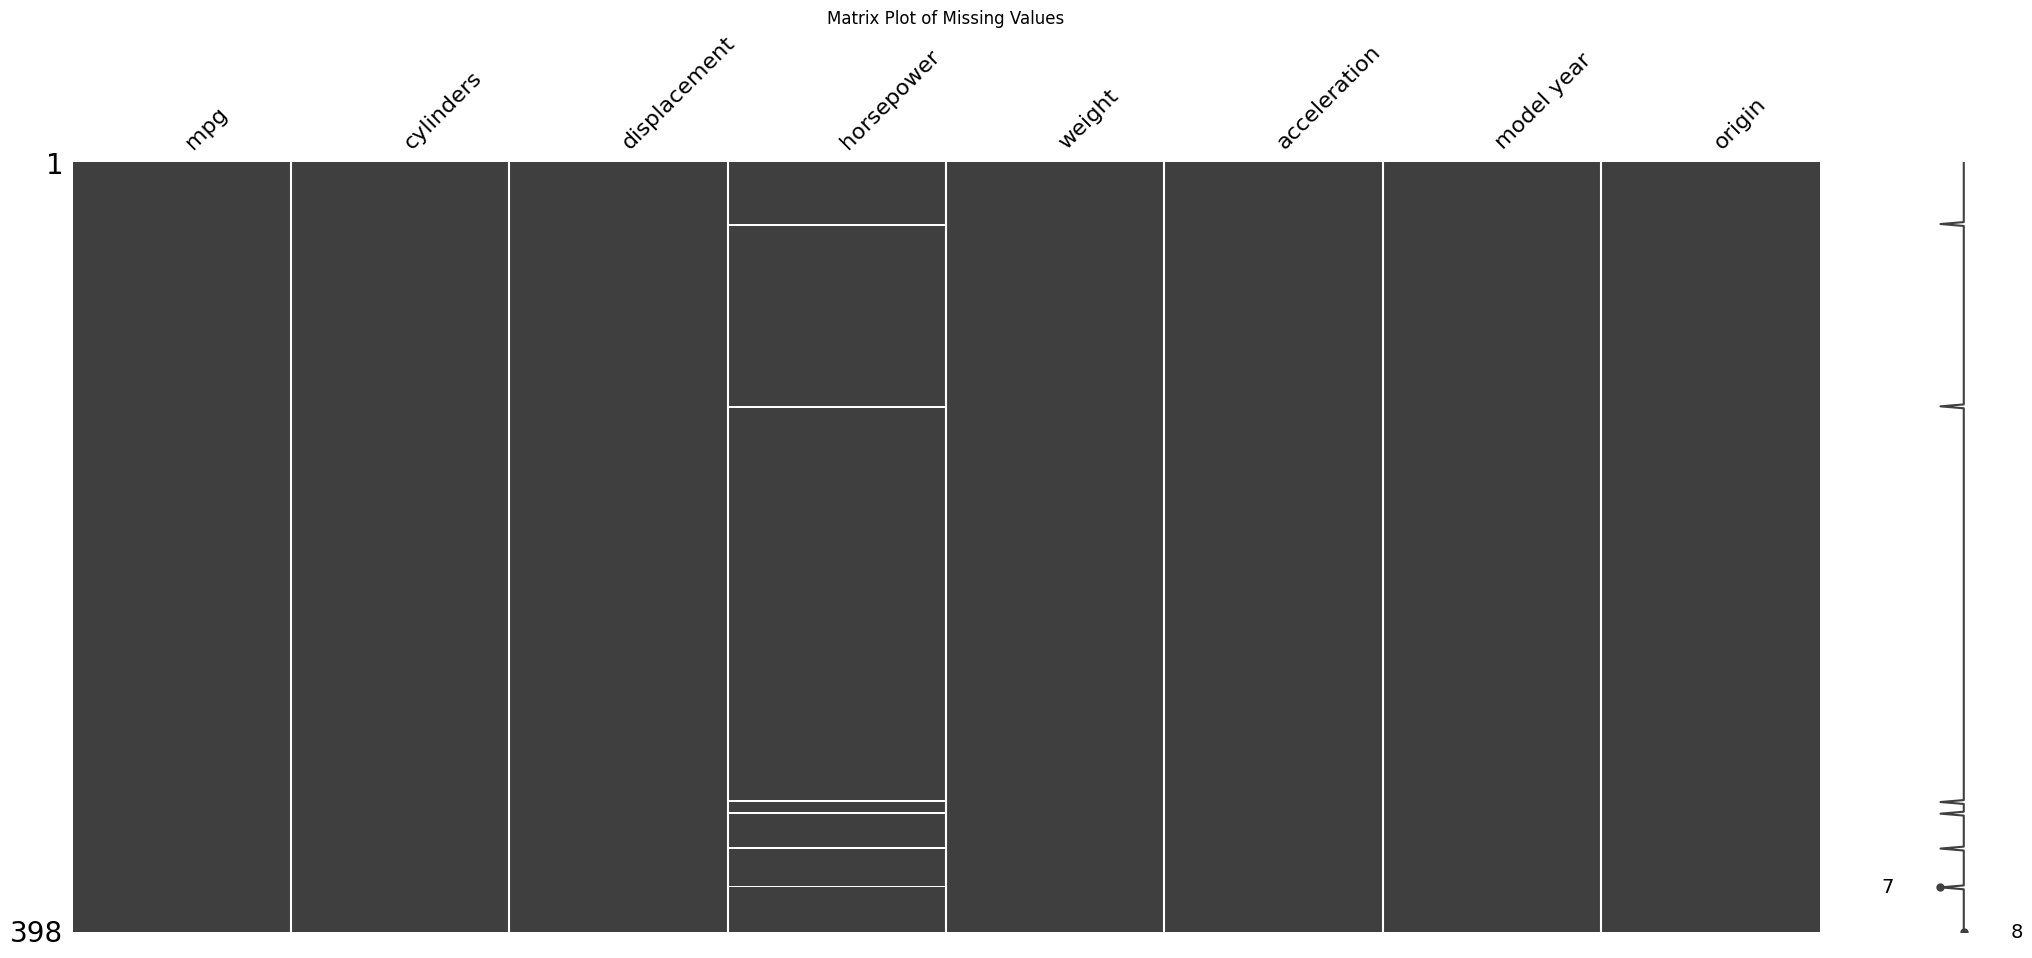

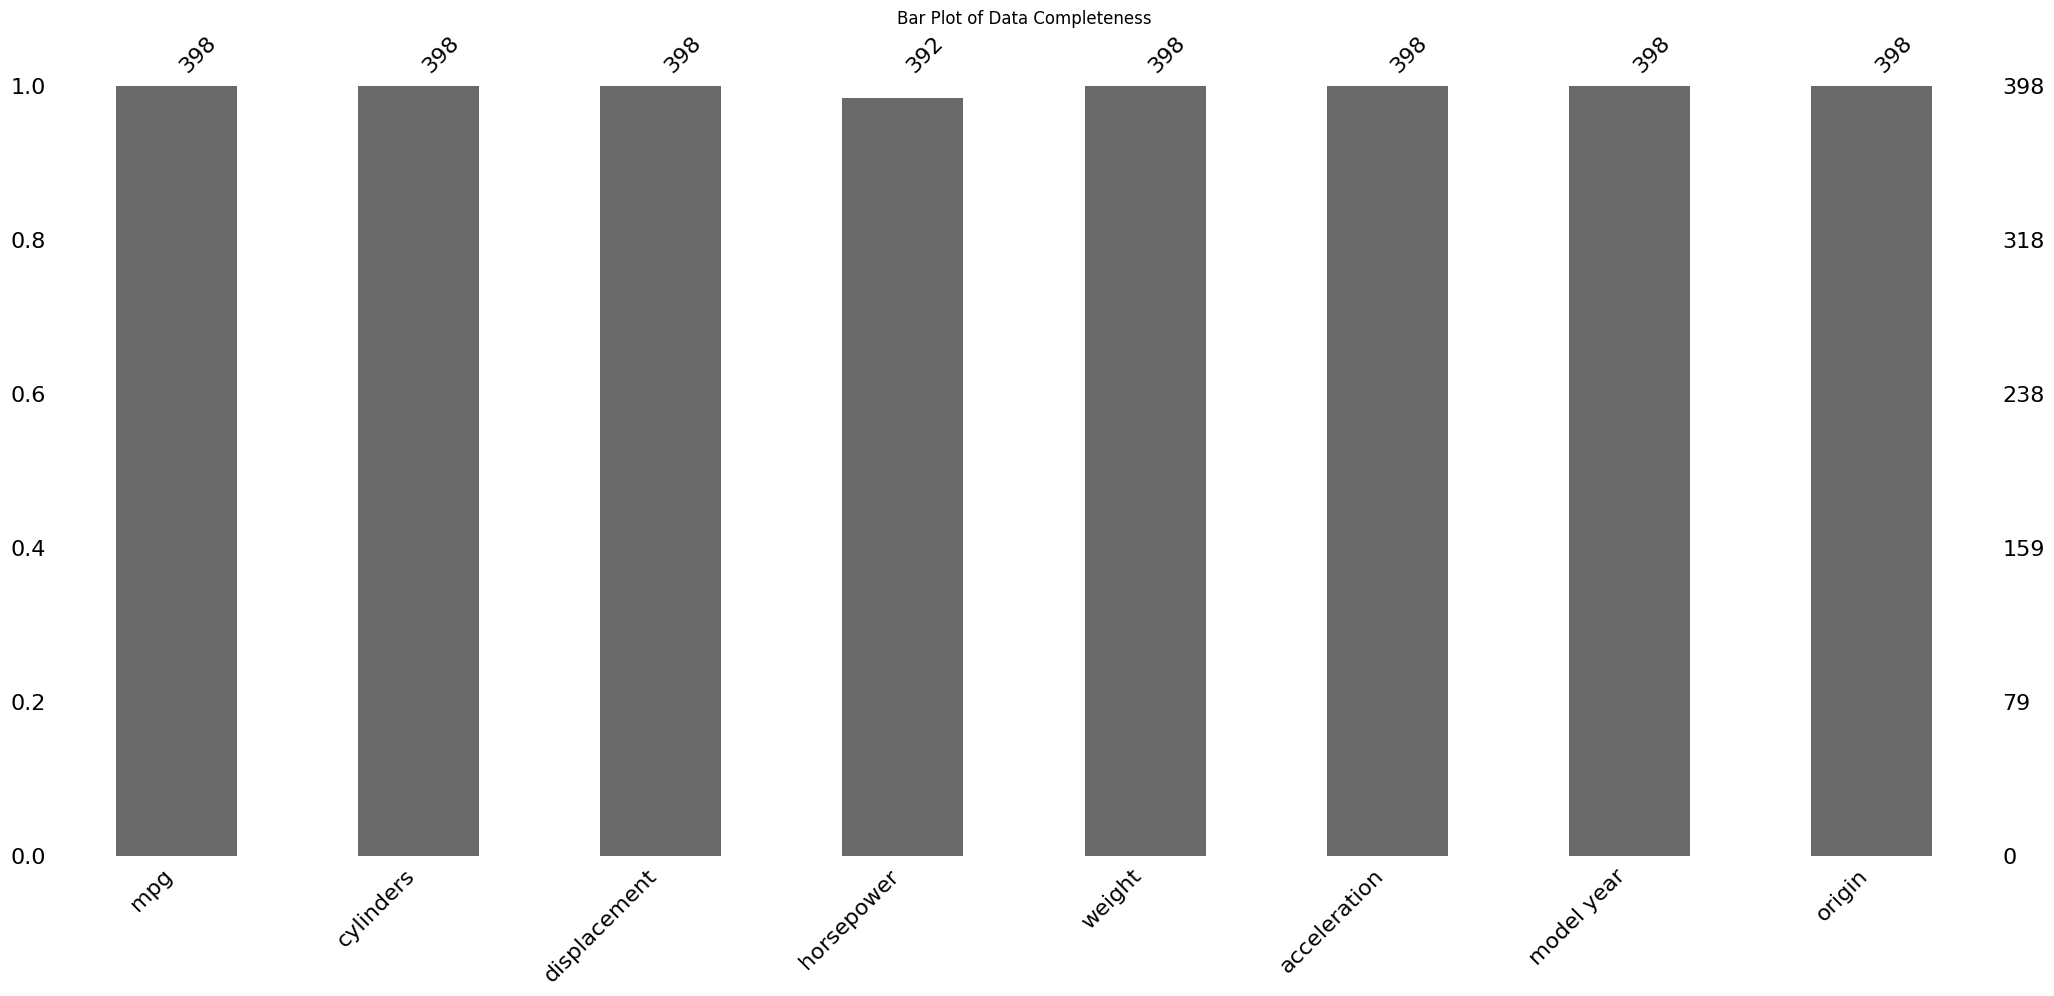


--- Target Variable Analysis: 'mpg' ---


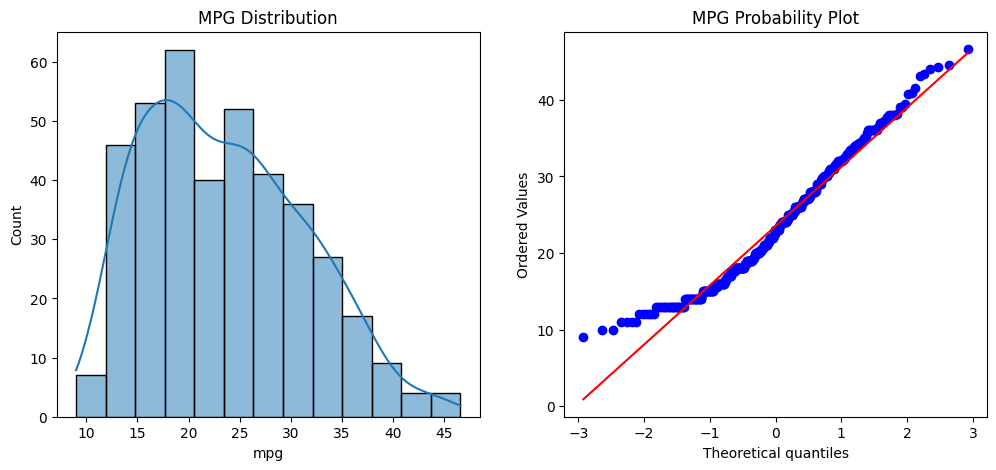

Skewness of MPG: 0.46

--- Correlation Analysis ---


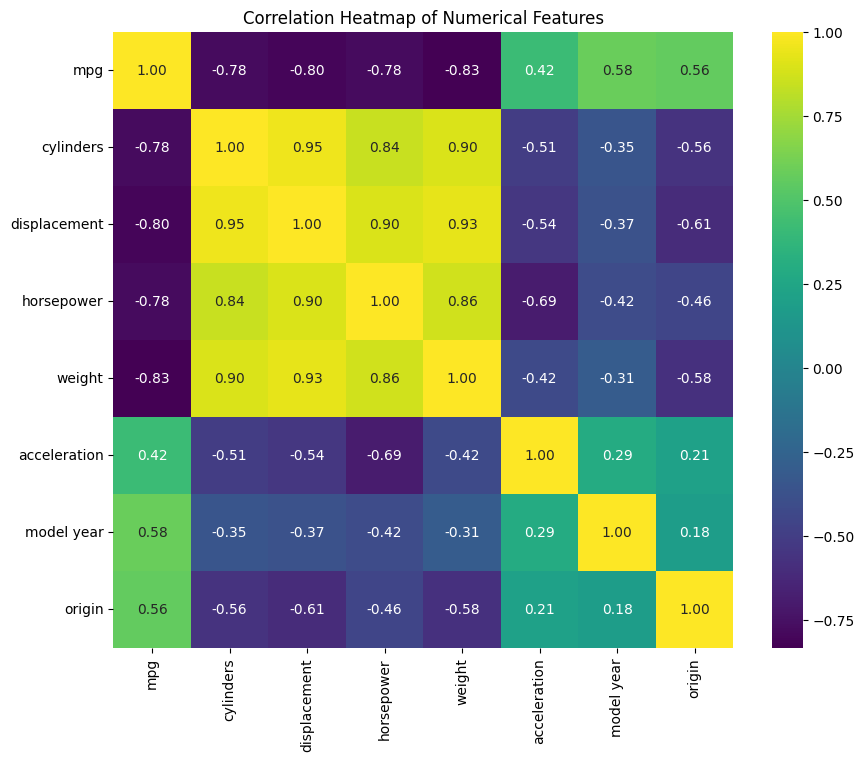


Correlation with MPG:
mpg             1.000000
model year      0.579267
origin          0.563450
acceleration    0.420289
cylinders      -0.775396
horsepower     -0.778427
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

--- Bivariate Analysis: Scatter Plots vs. MPG ---


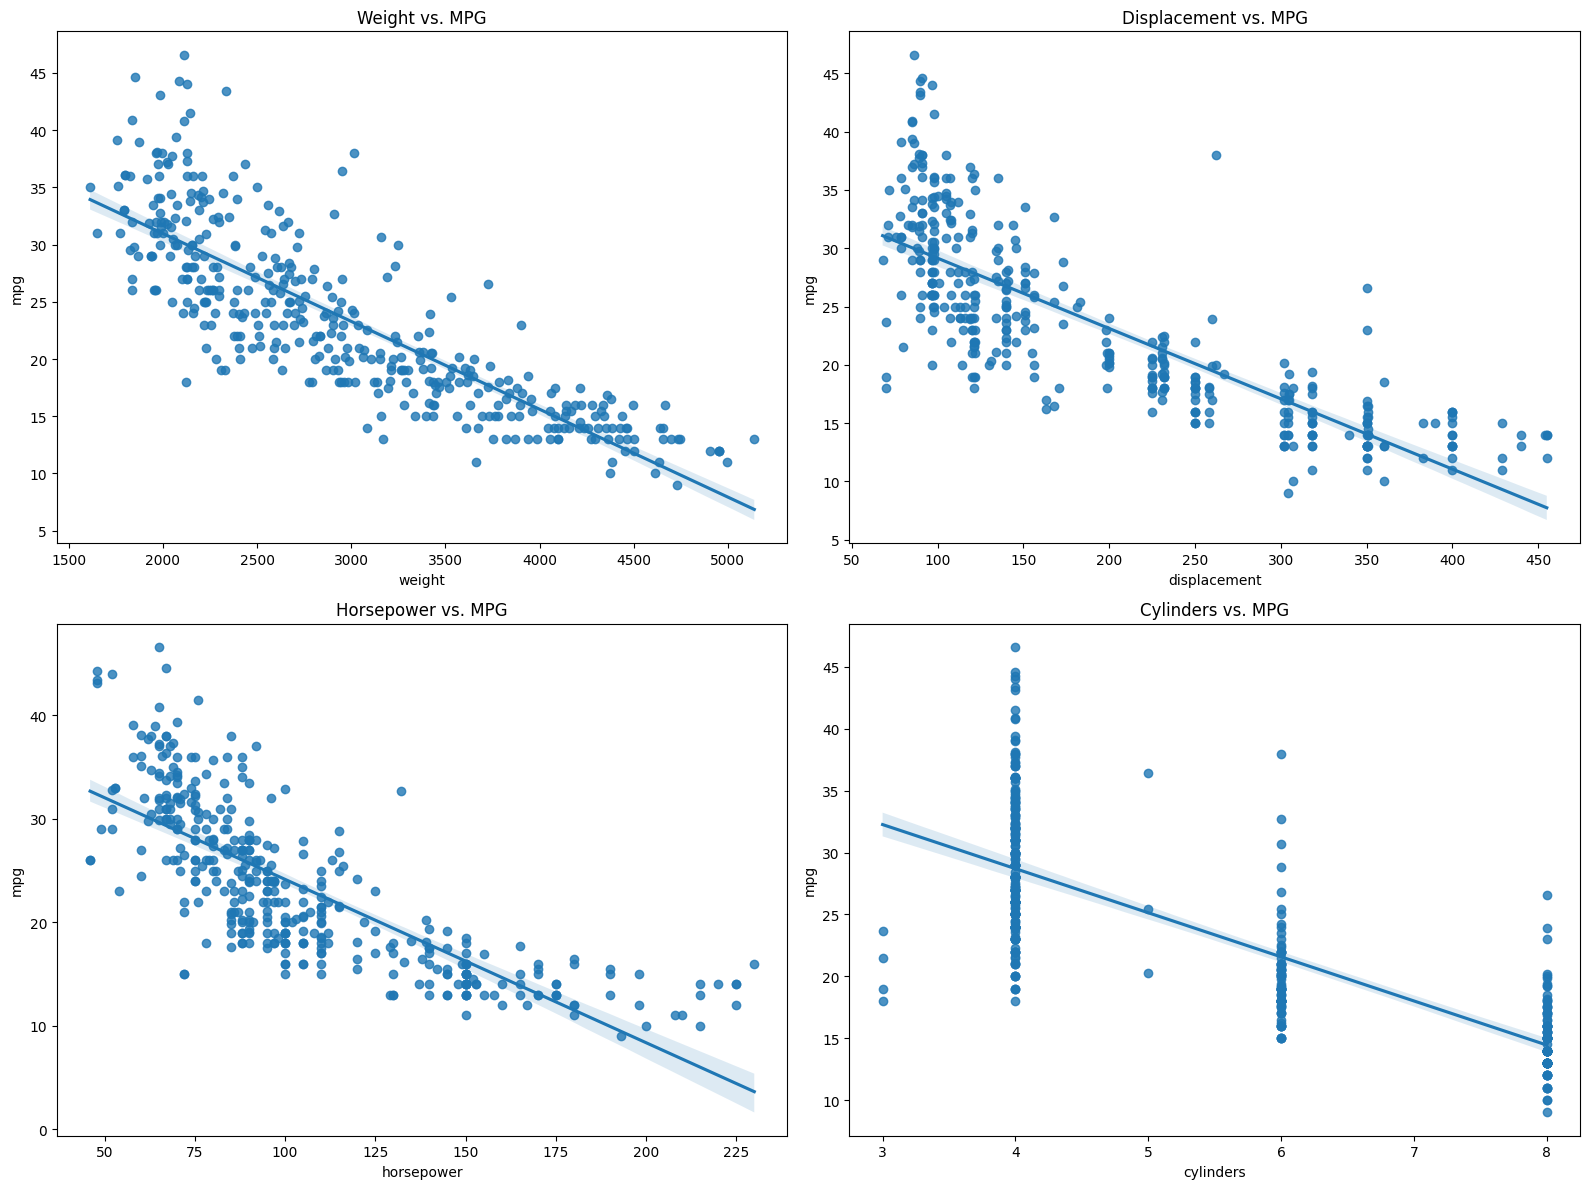


--- Categorical Feature Analysis ---


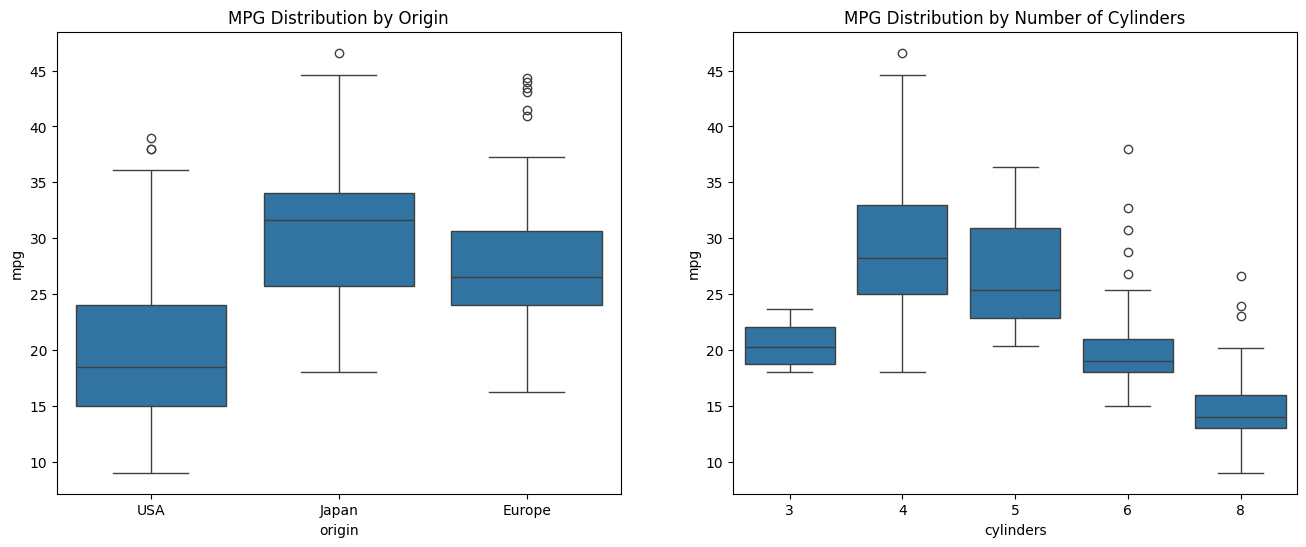

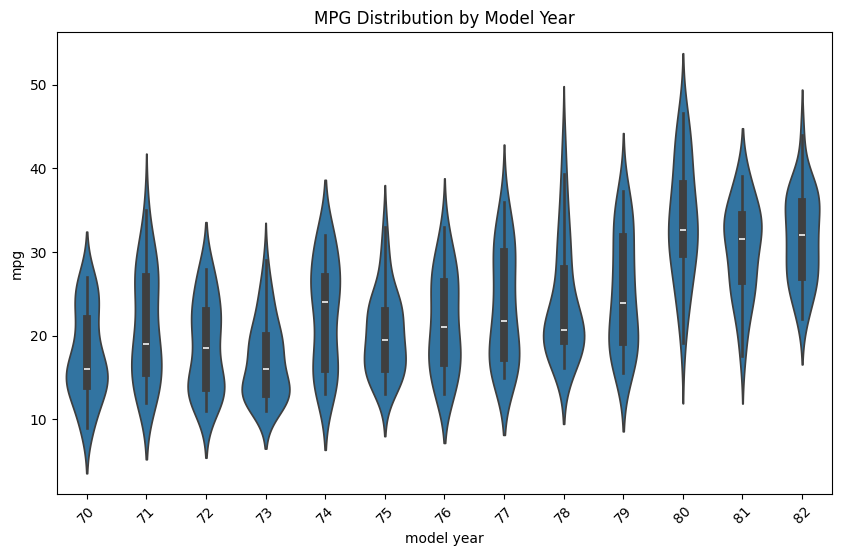

In [ ]:
# @title Phase 1: Setup and Data Loading
# -----------------------------------------
# Import all necessary libraries for the analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import missingno as msno
import scipy.stats as st

# Set some display options for pandas and matplotlib for better visualization
%matplotlib inline
pd.set_option('display.max_columns', None)


# --- Load Data from Google Drive ---
# Mount your Google Drive to access the file.
print("Mounting Google Drive...")
drive.mount('/content/drive', force_remount=True)

# Define the path to your single CSV file.
file_path = '/content/drive/My Drive/Unit02 auto-mpg (1) (1).csv'

# Read the data.
try:
    print(f"\nLoading data from: {file_path}")
    dataset = pd.read_csv(file_path, na_values='?')
    print("File loaded successfully!")
except FileNotFoundError:
    print(f"ERROR: File not found at '{file_path}'. Please check the path and filename.")
    # Stop execution if the file isn't found
    dataset = None

# --- Initial Data Inspection ---
if dataset is not None:
    print("\n--- Raw Data Sample (First 5 Rows) ---")
    print(dataset.head())

    print("\n--- Data Dimensions ---")
    print(dataset.shape)

    print("\n--- Basic Statistical Summary ---")
    print(dataset.describe().transpose())


# @title Phase 2: Data Cleaning and Feature Identification
# ---------------------------------------------------------
if dataset is not None:
    # --- Clean the Data ---
    # The 'car name' column is a unique identifier for each car and isn't useful
    # for a regression model, so we can drop it.
    dataset = dataset.drop('car name', axis=1)

    # --- Identify Feature Types ---
    # Separate columns into numerical and categorical for easier analysis
    numeric_features = dataset.select_dtypes(include=np.number)
    categorical_features = dataset.select_dtypes(include='object') # 'origin' is categorical but currently numeric

    # Manually add 'origin' and 'cylinders' to categorical for plotting, as they behave like categories
    # We will treat them as numeric for correlation but as categories for distribution plots.
    print("\nNumerical Features:")
    print(numeric_features.columns.tolist())

    # Map origin for clarity in plots
    dataset['origin'] = dataset['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
    print("\nCategorical Features (including 'origin' and 'cylinders' for EDA purposes):")
    print(dataset.select_dtypes(include='object').columns.tolist() + ['cylinders'])


# @title Phase 3: Exploratory Data Analysis (EDA)
# ----------------------------------------------------------------
if dataset is not None:
    print("\n--- Deep Dive into Missing Values ---")
    # The matrix plot shows where missing values occur
    msno.matrix(dataset)
    plt.title("Matrix Plot of Missing Values")
    plt.show()

    # The bar plot gives a count of non-null values per column
    msno.bar(dataset)
    plt.title("Bar Plot of Data Completeness")
    plt.show()

    print("\n--- Target Variable Analysis: 'mpg' ---")
    # Check the distribution of the target variable, 'mpg'
    y = dataset['mpg']
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(y, kde=True)
    plt.title('MPG Distribution')

    plt.subplot(1, 2, 2)
    st.probplot(y, plot=plt)
    plt.title('MPG Probability Plot')
    plt.show()
    print(f"Skewness of MPG: {y.skew():.2f}")
    # A skewness close to 0 indicates a relatively normal distribution.

    print("\n--- Correlation Analysis ---")
    # A heatmap is great for seeing the correlation between numerical features.
    plt.figure(figsize=(10, 8))
    correlation = numeric_features.corr()
    sns.heatmap(correlation, annot=True, cmap='viridis', fmt='.2f')
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()

    print("\nCorrelation with MPG:")
    print(correlation['mpg'].sort_values(ascending=False))


    print("\n--- Bivariate Analysis: Scatter Plots vs. MPG ---")
    # Scatter plots help visualize the relationship between two numerical variables.
    # Let's look at the features most correlated with MPG.
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    sns.regplot(ax=axes[0, 0], x='weight', y='mpg', data=dataset)
    axes[0, 0].set_title('Weight vs. MPG')
    sns.regplot(ax=axes[0, 1], x='displacement', y='mpg', data=dataset)
    axes[0, 1].set_title('Displacement vs. MPG')
    sns.regplot(ax=axes[1, 0], x='horsepower', y='mpg', data=dataset)
    axes[1, 0].set_title('Horsepower vs. MPG')
    sns.regplot(ax=axes[1, 1], x='cylinders', y='mpg', data=dataset)
    axes[1, 1].set_title('Cylinders vs. MPG')
    plt.tight_layout()
    plt.show()


    print("\n--- Categorical Feature Analysis ---")
    # Box plots are great for seeing the distribution across categories.
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.boxplot(ax=axes[0], x='origin', y='mpg', data=dataset)
    axes[0].set_title('MPG Distribution by Origin')

    sns.boxplot(ax=axes[1], x='cylinders', y='mpg', data=dataset)
    axes[1].set_title('MPG Distribution by Number of Cylinders')
    plt.show()

    # We can also use a violin plot which combines a box plot with a kernel density estimate.
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='model year', y='mpg', data=dataset) # Corrected column name here
    plt.title('MPG Distribution by Model Year')
    plt.xticks(rotation=45)
    plt.show()

